In [24]:
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

In [3]:
def add_path(file_, path):
  '''
  add the images folder to the file name

  Args:
    file_ (str) --> file that is inside the folder
    path (str) --> folder that contains the files
  
  Returns:
    filepath (str) --> file with destination path
  '''

  return path + file_

In [ ]:
!cp /content/drive/MyDrive/datasets/chexpert-v10-small.zip /content/
!unzip /content/chexpert-v10-small.zip

In [44]:
chexpert_df = pd.read_csv('/content/CheXpert-v1.0-small/train.csv')
chexpert_df = chexpert_df.fillna(0)

chexpert_df = chexpert_df.drop(['Age', 'Enlarged Cardiomediastinum', 
                                'Cardiomegaly', 'Pleural Other',
                                'Fracture', 'Support Devices', 
                                'Lung Lesion', 'Consolidation',
                                'Pneumonia', 'Edema'], axis = 1)

chexpert_df = chexpert_df[chexpert_df['Frontal/Lateral'] == 'Frontal']
chexpert_df = chexpert_df[(chexpert_df['AP/PA'] == 'AP') |
                          (chexpert_df['AP/PA'] == 'PA')]
chexpert_df = chexpert_df.drop(['Frontal/Lateral', 'AP/PA'], axis = 1)

In [45]:
path = list(chexpert_df['Path'])
partial_add_path = partial(add_path, path = '/content/')
path = list(map(partial_add_path, path))
chexpert_df['Path'] = path
chexpert_df['Sex'].replace({'Female': 'female', 'Male': 'male'}, inplace = True)

In [46]:
findings = list()
classes = list(chexpert_df.columns)[2:]

for classe in classes:
  classes_aux = classes.copy()
  classes_aux.remove(classe)
  finding = chexpert_df[(chexpert_df[classe] == 1.0) & 
                        (chexpert_df[classes_aux[0]] == 0.0) &
                        (chexpert_df[classes_aux[1]] == 0.0) &
                        (chexpert_df[classes_aux[2]] == 0.0) &
                        (chexpert_df[classes_aux[3]] == 0.0)]
  findings.append(finding)

for index, sub in enumerate(findings):
  if index == 0:
    chexpert_df = sub
  elif index != len(findings):
    chexpert_df = pd.concat((chexpert_df, sub))

In [47]:
chexpert_df['Dataset'] = ['CheXpert'] * len(chexpert_df)
chexpert_df['Label Type'] = ['Multiclass'] * len(chexpert_df)
columns = np.concatenate((['Dataset', 'Path', 'Sex', 'Label Type'], classes))
chexpert_df = chexpert_df[columns]

In [48]:
count_findings = list()
for finding in classes:
  count = dict(chexpert_df[finding].value_counts())[1.0]
  count_findings.append(count)

min_classe = min(count_findings)
sub_chexpert_df = list()
for index, finding in enumerate(classes):
  sub_chexpert_df.append(chexpert_df[chexpert_df[finding] == 1])
  sub_chexpert_df[index] = sub_chexpert_df[index].sample(n = min_classe)

for index, sub in enumerate(sub_chexpert_df):
  if index == 0:
    chexpert_df = sub
  elif index != len(sub_chexpert_df):
    chexpert_df = pd.concat((chexpert_df, sub))

Text(0.5, 1.0, 'Quantidade Total de Imagens: Base de Dados CheXpert - Multiclasse')

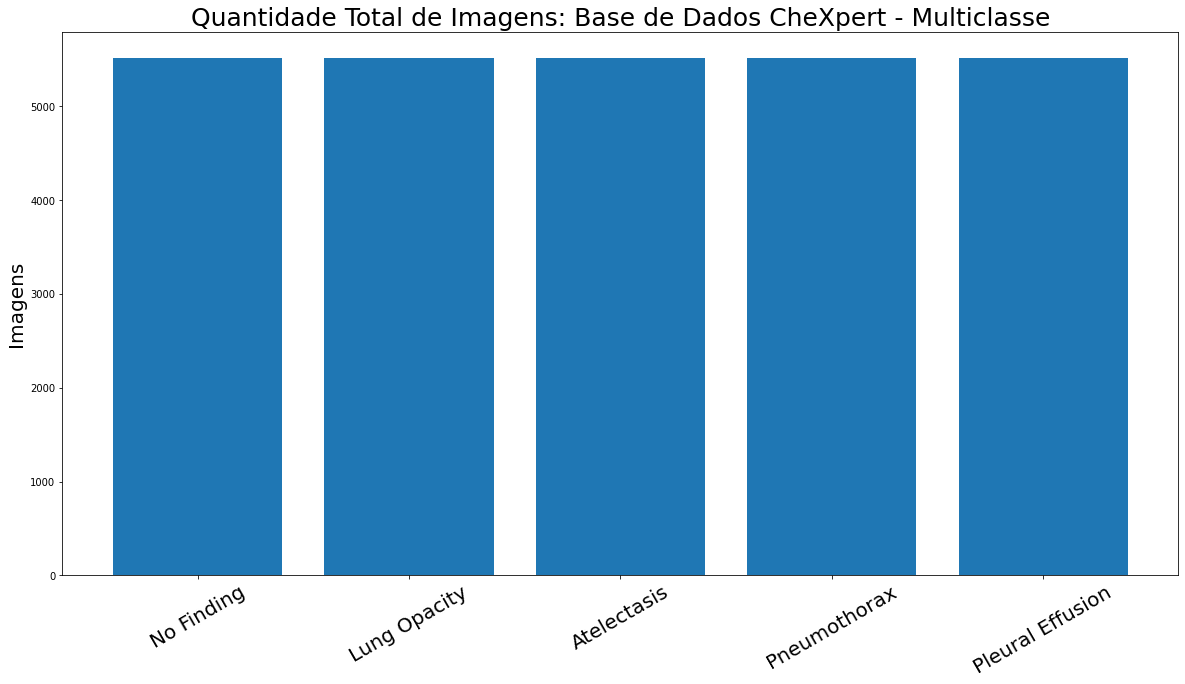

In [50]:
count_findings = list()
for finding in classes:
  count = list(chexpert_df[finding].value_counts())[1]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(classes, count_findings)
plt.xticks(rotation = 30, size = 20)
plt.ylabel('Imagens', size = 20)
plt.title('Quantidade Total de Imagens: Base de Dados CheXpert - Multiclasse', 
          size = 25)

In [51]:
chexpert_df.to_csv(path_or_buf = 'chexpert_df_multiclass.csv', columns = columns)